<a href="https://colab.research.google.com/github/kylemcq13/Projects/blob/master/16_3_Data_Cleaning_Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment

In this assignment, you'll be working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, click the Kaggle link above. 

Access this data from the Thinkful database using the following credentials:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'useducation'<br>

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Determine all the variable types and find the fraction of the missing values for each variable.
2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?
3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using *only* the observations for that specific year.
4. This time, fill in the missing values using interpolation (extrapolation).
5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

In [0]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [0]:
#preview the dataset
edu_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [0]:
#1. Determine all the variable types and find the fraction of the missing values for each variable.

In [0]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [0]:
edu_df.isnull().sum()*100/edu_df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [0]:
#2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

In [0]:
#filling in average values for all columns would make sense. Given that over 60% of all test score values are null values,
#would filling in the average values here hurt the data? Discuss. 

#Throwing out the lower percentage null value columns might make sense such as "GRADES_KG_G", but using the average would be
# preferred?

#edu_df["ENROLL"].fillna(edu_df["ENROLL"].mean(), inplace=True)
#edu_df["TOTAL_REVENUE"].fillna(edu_df["TOTAL_REVENUE"].mean(), inplace=True)
#edu_df["FEDERAL_REVENUE"].fillna(edu_df["FEDERAL_REVENUE"].mean(), inplace=True)
#edu_df["STATE_REVENUE"].fillna(edu_df["STATE_REVENUE"].mean(), inplace=True)
#edu_df["LOCAL_REVENUE"].fillna(edu_df["LOCAL_REVENUE"].mean(), inplace=True)
#edu_df["TOTAL_EXPENDITURE"].fillna(edu_df["TOTAL_EXPENDITURE"].mean(), inplace=True)
#edu_df["INSTRUCTION_EXPENDITURE"].fillna(edu_df["INSTRUCTION_EXPENDITURE"].mean(), inplace=True)
#edu_df["SUPPORT_SERVICES_EXPENDITURE"].fillna(edu_df["SUPPORT_SERVICES_EXPENDITURE"].mean(), inplace=True)
#edu_df["OTHER_EXPENDITURE"].fillna(edu_df["OTHER_EXPENDITURE"].mean(), inplace=True)
#edu_df["CAPITAL_OUTLAY_EXPENDITURE"].fillna(edu_df["CAPITAL_OUTLAY_EXPENDITURE"].mean(), inplace=True)
#edu_df["GRADES_PK_G"].fillna(edu_df["GRADES_PK_G"].mean(), inplace=True)
#edu_df["GRADES_KG_G"].fillna(edu_df["GRADES_KG_G"].mean(), inplace=True)
#edu_df["GRADES_4_G"].fillna(edu_df["GRADES_4_G"].mean(), inplace=True)
#edu_df["GRADES_8_G"].fillna(edu_df["GRADES_8_G"].mean(), inplace=True)
#edu_df["GRADES_12_G"].fillna(edu_df["GRADES_12_G"].mean(), inplace=True)
#edu_df["GRADES_1_8_G"].fillna(edu_df["GRADES_1_8_G"].mean(), inplace=True)
#edu_df["GRADES_9_12_G"].fillna(edu_df["GRADES_9_12_G"].mean(), inplace=True)
#edu_df["GRADES_ALL_G"].fillna(edu_df["GRADES_ALL_G"].mean(), inplace=True)
#edu_df["AVG_MATH_4_SCORE"].fillna(edu_df["AVG_MATH_4_SCORE"].mean(), inplace=True)
#edu_df["AVG_MATH_8_SCORE"].fillna(edu_df["AVG_MATH_8_SCORE"].mean(), inplace=True)
#edu_df["AVG_READING_4_SCORE"].fillna(edu_df["AVG_READING_4_SCORE"].mean(), inplace=True)
#edu_df["AVG_READING_8_SCORE"].fillna(edu_df["AVG_READING_8_SCORE"].mean(), inplace=True)


In [0]:
#an alternative approach - list all columns then pass the list to a for loop filling in all na values with the means
#is a for loop the best way to solve this? 
edu2_df = edu_df.copy()

columns = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
           "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
           "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
           "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
           "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
           "GRADES_9_12_G", "GRADES_ALL_G", "AVG_MATH_4_SCORE", "AVG_MATH_8_SCORE", 
           "AVG_READING_4_SCORE", "AVG_READING_8_SCORE"]
     
for col in columns:
    edu2_df.loc[:, col] = edu2_df.loc[:, col].fillna(edu2_df.loc[:, col].mean())

In [0]:
#function check
edu2_df.isnull().sum()*100/edu_df.isnull().count()

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

In [0]:
#3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [0]:
#build on the previous for loop to take time factor into account
edu3_df = edu_df.copy()
years = edu3_df["YEAR"].unique()

for col in columns:
    for year in years:
        edu3_df.loc[edu3_df["YEAR"] == year, col] = edu3_df.loc[edu3_df["YEAR"] == year, col].fillna(edu3_df[edu_df["YEAR"] == year][col].mean())
    

In [0]:
edu3_df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.307067
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,218.410116,266.360319,212.712256,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.307067
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,47009.0,18173.0,70000.0,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,1276685.0,511557.0,1819706.0,213.689751,259.908848,204.882606,262.118986


In [0]:
#4. This time, fill in the missing values using interpolation (extrapolation).

# to do this, I use the same for loop as question 3, but use interpolate() instead of mean()
#Enroll, OTHER_EXPENDITURE, and AVG_READING_8_SCORE still have missing values, why?

edu4_df = edu_df.copy()

for col in columns:
    edu4_df.loc[:, col] = edu4_df.loc[:, col].fillna(edu4_df.loc[:, col].interpolate())

In [0]:
edu4_df.isnull().sum()*100/edu4_df.isnull().count()

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          2.412869
TOTAL_REVENUE                   0.000000
FEDERAL_REVENUE                 0.000000
STATE_REVENUE                   0.000000
LOCAL_REVENUE                   0.000000
TOTAL_EXPENDITURE               0.000000
INSTRUCTION_EXPENDITURE         0.000000
SUPPORT_SERVICES_EXPENDITURE    0.000000
OTHER_EXPENDITURE               2.412869
CAPITAL_OUTLAY_EXPENDITURE      0.000000
GRADES_PK_G                     0.000000
GRADES_KG_G                     0.000000
GRADES_4_G                      0.000000
GRADES_8_G                      0.000000
GRADES_12_G                     0.000000
GRADES_1_8_G                    0.000000
GRADES_9_12_G                   0.000000
GRADES_ALL_G                    0.000000
AVG_MATH_4_SCORE                0.000000
AVG_MATH_8_SCORE                0.000000
AVG_READING_4_SCORE             0.000000
AVG_READING_8_SC

In [0]:
#5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

In [0]:
print(edu2_df.describe())

              YEAR        ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
count  1492.000000  1.492000e+03   1.492000e+03     1.492000e+03   
mean   2004.433646  9.159308e+05   9.092082e+06     7.663723e+05   
std       7.393983  9.667725e+05   1.087818e+07     1.060702e+06   
min    1992.000000  4.386600e+04   4.656500e+05     3.102000e+04   
25%    1998.000000  3.150940e+05   2.546261e+06     2.170200e+05   
50%    2004.000000  8.204140e+05   6.359310e+06     5.167410e+05   
75%    2011.000000  9.211780e+05   9.276958e+06     7.663723e+05   
max    2017.000000  6.307022e+06   8.921726e+07     9.990221e+06   

       STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
count   1.492000e+03   1.492000e+03       1.492000e+03   
mean    4.216553e+06   4.109157e+06       9.196681e+06   
std     5.133895e+06   5.078230e+06       1.109393e+07   
min     0.000000e+00   2.209300e+04       4.816650e+05   
25%     1.356434e+06   9.447962e+05       2.523968e+06   
50%     3.127639e+06   2.697257e+06    

In [0]:
print(edu3_df.describe())

              YEAR        ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
count  1492.000000  1.385000e+03   1.441000e+03     1.441000e+03   
mean   2004.433646  9.161654e+05   9.084108e+06     7.662749e+05   
std       7.393983  1.003532e+06   1.110204e+07     1.085057e+06   
min    1992.000000  4.386600e+04   4.656500e+05     3.102000e+04   
25%    1998.000000  2.867590e+05   2.425600e+06     2.068530e+05   
50%    2004.000000  7.374010e+05   5.778507e+06     4.461800e+05   
75%    2011.000000  9.624880e+05   1.116863e+07     8.956420e+05   
max    2017.000000  6.307022e+06   8.921726e+07     9.990221e+06   

       STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
count   1.441000e+03   1.441000e+03       1.441000e+03   
mean    4.213597e+06   4.104236e+06       9.190557e+06   
std     5.237195e+06   5.181475e+06       1.132084e+07   
min     0.000000e+00   2.209300e+04       4.816650e+05   
25%     1.319582e+06   8.747060e+05       2.427316e+06   
50%     2.857497e+06   2.398344e+06    

In [0]:
print(edu4_df.describe())

              YEAR        ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
count  1492.000000  1.456000e+03   1.492000e+03     1.492000e+03   
mean   2004.433646  1.005984e+06   1.111164e+07     8.922691e+05   
std       7.393983  1.009158e+06   1.200155e+07     1.106788e+06   
min    1992.000000  4.386600e+04   4.656500e+05     3.102000e+04   
25%    1998.000000  2.973995e+05   2.546261e+06     2.170200e+05   
50%    2004.000000  7.540845e+05   6.351760e+06     5.165190e+05   
75%    2011.000000  1.595024e+06   1.803650e+07     1.411794e+06   
max    2017.000000  6.307022e+06   8.921726e+07     9.990221e+06   

       STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
count   1.492000e+03   1.492000e+03       1.492000e+03   
mean    4.913351e+06   5.306024e+06       1.114374e+07   
std     5.423675e+06   5.900909e+06       1.212433e+07   
min     0.000000e+00   2.209300e+04       4.816650e+05   
25%     1.356434e+06   9.447962e+05       2.523968e+06   
50%     3.119414e+06   2.650904e+06    

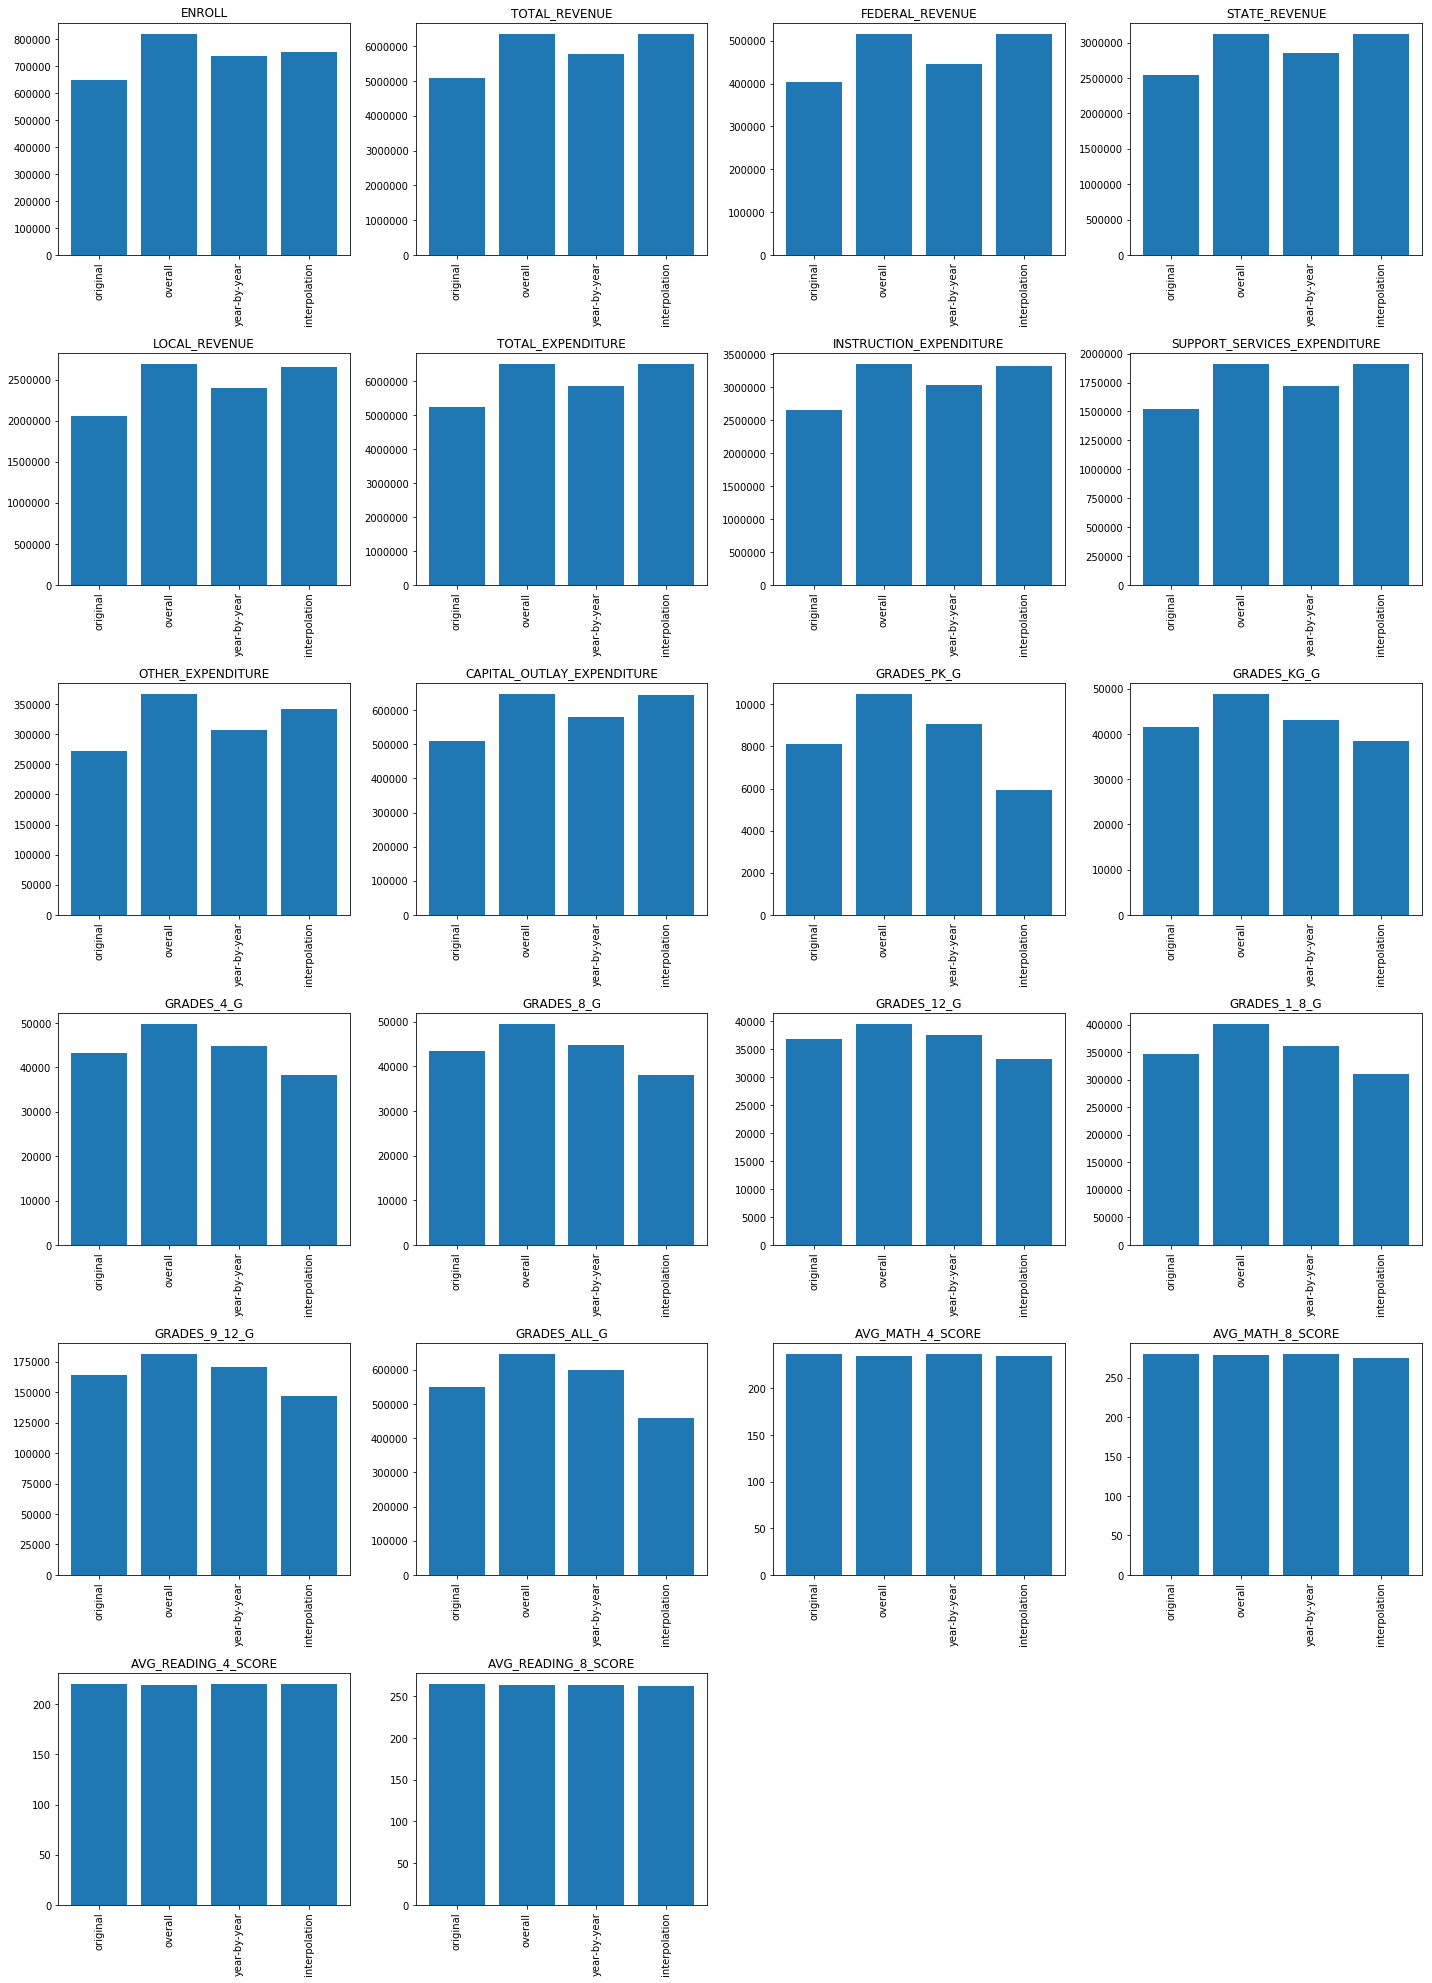

In [0]:
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(columns):
    df = pd.concat([edu_df[col], edu2_df[col],
                     edu3_df[col], edu4_df[col]], axis=1)
    
    plt.subplot(len(columns), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], df.median())
    plt.xticks(rotation='vertical')
    plt.title("{}".format(col))
    
plt.tight_layout()
plt.show()